## 벤치마킹 비교용 코스피 200 누적 수익률

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

# todo : 코스피 데이터 불러와서 dataframe 만들고 timestamp 맞추고 pickle로 저장하는 로직 작성

def make_benchmark_kospi200(pickle_path:str,start_date:str, end_date:str)-> pd.DataFrame:
    if os.path.isfile(pickle_path):
        return pd.read_pickle(pickle_path)

    # 코스피 200 지수의 티커 코드
    KOSPI_TICKER = "^KS200"


    # 코스피 200 지수의 데이터를 가져오기
    ks= yf.download(KOSPI_TICKER, start=start_date, end=end_date, interval='1d')
    kospi_200 = ks['Adj Close']
    # 12월 29일 수정종가를 다음해 1월 1일 수정종가로 변경(DataGuide 정책)
    index_list = kospi_200.index.tolist()
    index_list[0] = pd.to_datetime(start_date)
    kospi_200.index = index_list

    kospi_200.to_pickle(pickle_path)
    return kospi_200

In [3]:
benchmark_kospi_202001_202203 = make_benchmark_kospi200('./pickle/202001_202203_KOSPI_200.pickle','2020-01-01','2022-03-01')
benchmark_kospi_201801_201912 = make_benchmark_kospi200('./pickle/201801_201912_KOSPI_200.pickle','2018-01-01','2019-12-01')

In [4]:
def make_cumulative_return(pickle_path:str,df:pd.DataFrame)-> pd.DataFrame:
    if os.path.isfile(pickle_path):
        return pd.read_pickle(pickle_path)
    
    df_return = df.pct_change().dropna()
    # 누적 수익률 계산
    df_cumulative_returns = (1 + df_return).cumprod() -1

    df_cumulative_returns.to_pickle(pickle_path)
    
    
    return df_cumulative_returns

In [5]:
cum_202001_202203 = make_cumulative_return('./pickle/202001_202203_CUM_KOSPI_200.pickle',benchmark_kospi_202001_202203)
cum_201801_201912 = make_cumulative_return('./pickle/201801_201912_CUM_KOSPI_200.pickle',benchmark_kospi_201801_201912)


In [6]:
cum_201801_201912

2018-01-03    0.003466
2018-01-04   -0.004356
2018-01-05    0.009110
2018-01-08    0.016196
2018-01-09    0.013037
                ...   
2019-11-25   -0.134386
2019-11-26   -0.135491
2019-11-27   -0.132362
2019-11-28   -0.137331
2019-11-29   -0.150982
Name: Adj Close, Length: 469, dtype: float64

## 금리 인상 일때 코스피200 누적 수익률 차트

In [7]:
increase_rate_info = {
    "title" : "benchmark kospi200 when intereset increase",
    "start_date" : '2020-01-01',
    "end_date" : "2021-01-01",
    "save_url" : f"./fig/bench/interest_increase",
    "data_df" : cum_202001_202203,
}

In [8]:
def plot_chart(title:str, start_date:str, end_date:str, save_url:str, data_df:pd.DataFrame) -> None:
    
    # 그래프 설정
    plt.figure(figsize=(10, 6))
    # KOSPI 200 지수 
    plt.plot(data_df.loc[start_date:end_date], label='KOSPI 200 cumulative return', color='blue')

    # 그래프 제목 및 축 설정
    plt.title(title, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Returns', fontsize=12)
    # 날짜 라벨 회전
    plt.xticks(rotation=45)

    plt.legend()
    plt.grid(True)
    plt.savefig(f'{save_url}/{start_date}~{end_date}.png', format='png', dpi=300)

    plt.show()

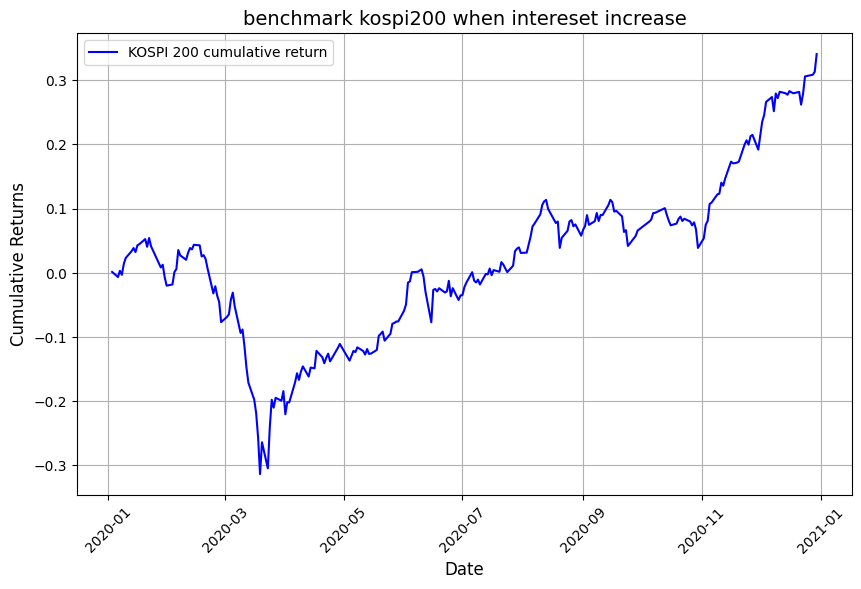

In [9]:
plot_chart(**increase_rate_info)

## 장단기 금리 역전 일때 코스피200 누적 수익률 차트

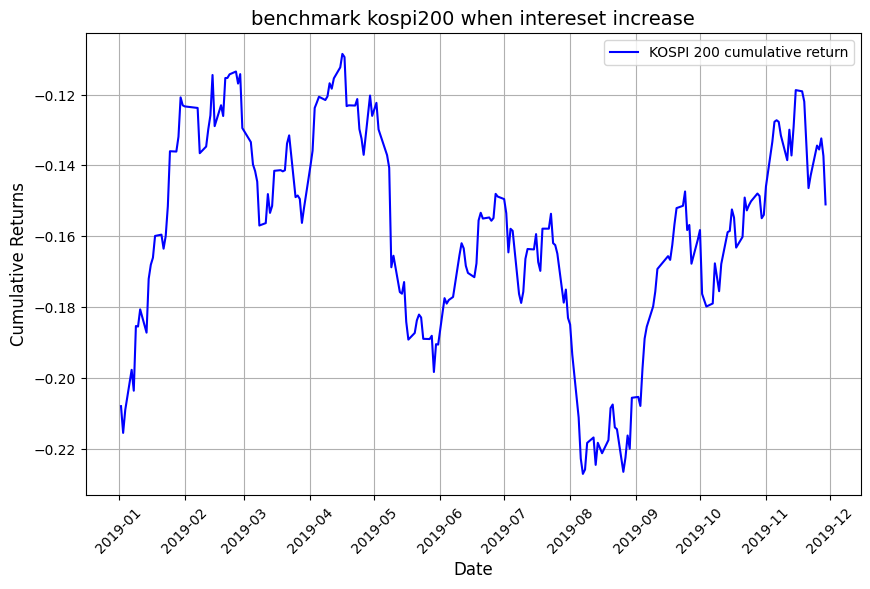

In [10]:
yield_curve_reverse = {
    "title" : "benchmark kospi200 when intereset increase",
    "start_date" : '2019-01-02',
    "end_date" : "2019-12-01",
    "save_url" : f"./fig/bench/yield_curve_reverse",
    "data_df" : cum_201801_201912,
}
plot_chart(**yield_curve_reverse)

## 샤프지수와 소프타노 지수

In [11]:
def make_daily_returns(df:pd.DataFrame)-> pd.DataFrame:
    return df.pct_change().dropna()

In [12]:
daily_return_kospi_202001_202203 =  make_daily_returns(benchmark_kospi_202001_202203)
daily_return_kospi_201801_201912 = make_daily_returns(benchmark_kospi_201801_201912)

In [13]:
from capstone.evaluate_index import calculate_sharpe, calculate_sortino

sharp_2021_01_02_2022_03_01 = calculate_sharpe(daily_return_kospi_202001_202203['2021-01-02':'2022-03-01'])
sortino_2021_01_02_2022_03_01 = calculate_sortino(daily_return_kospi_202001_202203['2021-01-02':'2022-03-01'])

In [14]:
print(f"금리 인상기간 샤프지수 : {sharp_2021_01_02_2022_03_01}")
print(f"금리 인상기간 소프타노 지수 : {sortino_2021_01_02_2022_03_01}")

금리 인상기간 샤프지수 : -0.4584693893430394
금리 인상기간 소프타노 지수 : -0.46492305007230483


In [15]:

sharp_201801_201912 = calculate_sharpe(daily_return_kospi_201801_201912['2019-01-02':'2019-12-01'])
sortino_201801_201912 = calculate_sortino(daily_return_kospi_201801_201912['2019-01-02':'2019-12-01'])

In [16]:
print(f"장단기 역전 기간 샤프지수 : {sharp_201801_201912}")
print(f"장단기 역전 기간 소프타노 지수 : {sortino_201801_201912}")

장단기 역전 기간 샤프지수 : 0.27566989424624044
장단기 역전 기간 소프타노 지수 : 0.2568735648304199
